<a href="https://colab.research.google.com/github/muroo123/python/blob/main/WebCrawling_section4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

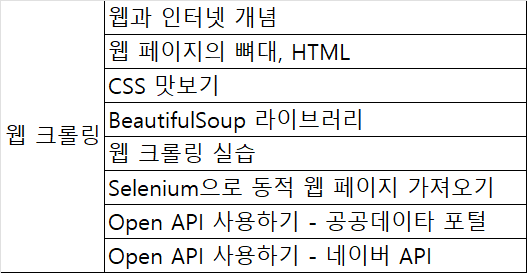

## Open API - 공공데이타 포털(기상청 일자료)

- www.data.go.kr
- 카카오톡, 네이버 계정으로 가입 가능
- 기상청으로 검색 -> 기상청_지상(종관, ASOS) 일자료 조회서비스 -> 활용 신청

- 마이페이지 -> API신청 -> 기상청_지상(종관, ASOS) 일자료 조회서비스
- 서비스정보 -> 참고문헌 파일에 상세 설명 있음
- 서비스정보 -> 일반 인증키(Encoding)에 있는 문자열이 개인 신청한 서비스키
- 활용신청 상세기능정보 -> 기상관측일자료목록조회 -> 미리보기 확인에서 sample 데이타 조회 가능

### 기상청 요청 페이지
- http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataListpublicDataPk=15073877

- http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList
?serviceKey=인증키&numOfRows=10&pageNo=1
&dataCd=ASOS&dateCd=DAY&startDt=20240501&endDt=20240510&stnIds=108

In [ ]:
# [1] urlopen, BeautifulSoup 라이브러리를 가져오기
from urllib.request import urlopen
from bs4 import BeautifulSoup


## 요청 메세지 확인하기
- 다운받은 파일에서 한기상청02_지상(종관,ASOS)일자료_조회서비스_오픈API활용가이드.docx 찾기
- 파일 8페이지에 요청/응답 메세지 예제에서 요청메세지 확인
- http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList
?serviceKey=인증키&numOfRows=10&pageNo=1
&dataCd=ASOS&dateCd=DAY&startDt=20100101&endDt=20100102&stnIds=108

- 요청메세지 변수에 값을 채워서 url 완성 후 페이지 요청하기


In [ ]:
# 요청 페이지 url과 serviceKey(공공데이터포털에서 받은 URL Encode인증키)
endpoint = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?'
serviceKey = 'mbEFdDMAXvjlftXV%2FBIqkcIRq6HI9BtxkW%2FHP%2BpSUkjfdl1qWrgf8qX7DIS%2BJ1TEIIu5JYmYbrCeYZ68XLlI%2FA%3D%3D'


In [ ]:
# [2] api 요청변수 채우기
# 한 페이지 결과 수 Default : 10
numOfRows   = 10
# 페이지번호 Default : 1
pageNo      = 1
# 요청자료형식(XML/JSON) Default : XML
dataType = 'XML'
# 자료 분류 코드(ASOS)
dataCd='ASOS'
#날짜 분류 코드(DAY)
dateCd='DAY'
# 조회 기간 시작일(YYYYMMDD)
startDt=20240501
# 조회 기간 종료일(YYYYMMDD) (전일(D-1)까지 제공)
endDt=20240510
#종관기상관측 지점 번호 (활용가이드 하단 첨부 참조)
stnIds = 108



In [ ]:
# [3] url 만들기 입니다. f스트링을 활용해 중괄호 쳐진 부분에 각 변수가 들어가도록 합니다.

url = f'{endpoint}serviceKey={serviceKey}&'\
    f'numOfRows={numOfRows}&'\
    f'pageNo={pageNo}&'\
    f'dataType={dataType}&'\
    f'dataCd={dataCd}&'\
    f'dateCd={dateCd}&'\
    f'startDt={startDt}&'\
    f'endDt={endDt}&'\
    f'stnIds={stnIds}'

print(url)


http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=mbEFdDMAXvjlftXV%2FBIqkcIRq6HI9BtxkW%2FHP%2BpSUkjfdl1qWrgf8qX7DIS%2BJ1TEIIu5JYmYbrCeYZ68XLlI%2FA%3D%3D&numOfRows=10&pageNo=1&dataType=XML&dataCd=ASOS&dateCd=DAY&startDt=20240501&endDt=20240510&stnIds=108


In [ ]:
# [4] urlopen을 사용하여 url을 가져옵니다.
result = urlopen(url)


In [ ]:
# [5] BeautifulSoup를 사용하여 xml 파일을 파싱
soup = BeautifulSoup(result, 'xml')
print(soup.prettify())

<?xml version="1.0" encoding="utf-8"?>
<response>
 <header>
  <resultCode>
   00
  </resultCode>
  <resultMsg>
   NORMAL_SERVICE
  </resultMsg>
 </header>
 <body>
  <dataType>
   XML
  </dataType>
  <items>
   <item>
    <stnId>
     108
    </stnId>
    <stnNm>
     서울
    </stnNm>
    <tm>
     2024-05-01
    </tm>
    <avgTa>
     18.5
    </avgTa>
    <minTa>
     13.9
    </minTa>
    <minTaHrmt>
     0535
    </minTaHrmt>
    <maxTa>
     24.0
    </maxTa>
    <maxTaHrmt>
     1552
    </maxTaHrmt>
    <mi10MaxRn/>
    <mi10MaxRnHrmt/>
    <hr1MaxRn/>
    <hr1MaxRnHrmt/>
    <sumRnDur/>
    <sumRn/>
    <maxInsWs>
     8.4
    </maxInsWs>
    <maxInsWsWd>
     70
    </maxInsWsWd>
    <maxInsWsHrmt>
     0202
    </maxInsWsHrmt>
    <maxWs>
     4.3
    </maxWs>
    <maxWsWd>
     50
    </maxWsWd>
    <maxWsHrmt>
     0318
    </maxWsHrmt>
    <avgWs>
     2.4
    </avgWs>
    <hr24SumRws>
     2100
    </hr24SumRws>
    <maxWd>
     70
    </maxWd>
    <avgTd>
     5.9
    </av

In [ ]:
# [6] XML파일에서 쓸모있는 데이터들은 모두 item태그에 있기 때문에 find_all 메서드를 사용하여 item태그를 가져옵니다.
item = soup.find_all('item')
# 총 데이타 확인
print(len(item))


10


In [ ]:
# [7] 첫번째 데이타 확인
print(item[0])

<item><stnId>108</stnId><stnNm>서울</stnNm><tm>2024-05-01</tm><avgTa>18.5</avgTa><minTa>13.9</minTa><minTaHrmt>0535</minTaHrmt><maxTa>24.0</maxTa><maxTaHrmt>1552</maxTaHrmt><mi10MaxRn/><mi10MaxRnHrmt/><hr1MaxRn/><hr1MaxRnHrmt/><sumRnDur/><sumRn/><maxInsWs>8.4</maxInsWs><maxInsWsWd>70</maxInsWsWd><maxInsWsHrmt>0202</maxInsWsHrmt><maxWs>4.3</maxWs><maxWsWd>50</maxWsWd><maxWsHrmt>0318</maxWsHrmt><avgWs>2.4</avgWs><hr24SumRws>2100</hr24SumRws><maxWd>70</maxWd><avgTd>5.9</avgTd><minRhm>27</minRhm><minRhmHrmt>1511</minRhmHrmt><avgRhm>46.0</avgRhm><avgPv>9.4</avgPv><avgPa>1001.8</avgPa><maxPs>1015.9</maxPs><maxPsHrmt>2347</maxPsHrmt><minPs>1008.8</minPs><minPsHrmt>0133</minPsHrmt><avgPs>1011.8</avgPs><ssDur>13.8</ssDur><sumSsHr>9.8</sumSsHr><hr1MaxIcsrHrmt>1200</hr1MaxIcsrHrmt><hr1MaxIcsr>3.43</hr1MaxIcsr><sumGsr>26.05</sumGsr><ddMefs/><ddMefsHrmt/><ddMes/><ddMesHrmt/><sumDpthFhsc/><avgTca>4.6</avgTca><avgLmac>3.6</avgLmac><avgTs>26.4</avgTs><minTg>10.0</minTg><avgCm5Te>19.8</avgCm5Te><avgCm10T

In [ ]:
# [7] 두번째 데이타 확인
print(item[1])

<item><stnId>108</stnId><stnNm>서울</stnNm><tm>2024-05-02</tm><avgTa>18.1</avgTa><minTa>12.4</minTa><minTaHrmt>0546</minTaHrmt><maxTa>23.7</maxTa><maxTaHrmt>1457</maxTaHrmt><mi10MaxRn/><mi10MaxRnHrmt/><hr1MaxRn/><hr1MaxRnHrmt/><sumRnDur/><sumRn/><maxInsWs>8.9</maxInsWs><maxInsWsWd>250</maxInsWsWd><maxInsWsHrmt>1506</maxInsWsHrmt><maxWs>5.2</maxWs><maxWsWd>250</maxWsWd><maxWsHrmt>1339</maxWsHrmt><avgWs>2.4</avgWs><hr24SumRws>2037</hr24SumRws><maxWd>250</maxWd><avgTd>6.3</avgTd><minRhm>29</minRhm><minRhmHrmt>1540</minRhmHrmt><avgRhm>48.4</avgRhm><avgPv>9.6</avgPv><avgPa>1007.7</avgPa><maxPs>1019.2</maxPs><maxPsHrmt>1054</maxPsHrmt><minPs>1015.9</minPs><minPsHrmt>0001</minPsHrmt><avgPs>1017.8</avgPs><ssDur>13.8</ssDur><sumSsHr>12.8</sumSsHr><hr1MaxIcsrHrmt>1200</hr1MaxIcsrHrmt><hr1MaxIcsr>3.48</hr1MaxIcsr><sumGsr>28.72</sumGsr><ddMefs/><ddMefsHrmt/><ddMes/><ddMesHrmt/><sumDpthFhsc/><avgTca>0.0</avgTca><avgLmac>0.0</avgLmac><avgTs>26.0</avgTs><minTg>7.8</minTg><avgCm5Te>19.8</avgCm5Te><avgCm

In [ ]:
# [8] 반복문으로 전체 데이타 뽑아내기

for idx in range(0,len(item)):
    item_dict= {}
    item_dict['stnId'] = item[idx].find('stnId').text
    item_dict['stnNm'] = item[idx].find('stnNm').text
    item_dict['tm'] = item[idx].find('tm').text
    item_dict['avgTa'] = item[idx].find('avgTa').text
    item_dict['minTa'] = item[idx].find('minTa').text
    item_dict['minTaHrmt'] = item[idx].find('minTaHrmt').text
    item_dict['maxTa'] = item[idx].find('minTaHrmt').text
    item_dict['maxTaHrmt'] = item[idx].find('minTaHrmt').text
    item_dict['sumRn'] = item[idx].find('sumRn').text
    item_dict['maxWs'] = item[idx].find('maxWs').text
    item_dict['sumGsr'] = item[idx].find('sumGsr').text
    item_dict['avgTs'] = item[idx].find('avgTs').text
    item_dict['avgCm5Te'] = item[idx].find('avgCm5Te').text
    item_dict['avgCm10Te'] = item[idx].find('avgCm10Te').text
    item_dict['avgCm20Te'] = item[idx].find('avgCm20Te').text
    item_dict['avgCm30Te'] = item[idx].find('avgCm30Te').text
    print(item_dict)



{'stnId': '108', 'stnNm': '서울', 'tm': '2024-05-01', 'avgTa': '18.5', 'minTa': '13.9', 'minTaHrmt': '0535', 'maxTa': '0535', 'maxTaHrmt': '0535', 'sumRn': '', 'maxWs': '4.3', 'sumGsr': '26.05', 'avgTs': '26.4', 'avgCm5Te': '19.8', 'avgCm10Te': '19.6', 'avgCm20Te': '18.8', 'avgCm30Te': '18.4'}
{'stnId': '108', 'stnNm': '서울', 'tm': '2024-05-02', 'avgTa': '18.1', 'minTa': '12.4', 'minTaHrmt': '0546', 'maxTa': '0546', 'maxTaHrmt': '0546', 'sumRn': '', 'maxWs': '5.2', 'sumGsr': '28.72', 'avgTs': '26.0', 'avgCm5Te': '19.8', 'avgCm10Te': '19.6', 'avgCm20Te': '18.9', 'avgCm30Te': '18.5'}
{'stnId': '108', 'stnNm': '서울', 'tm': '2024-05-03', 'avgTa': '19.7', 'minTa': '12.2', 'minTaHrmt': '0559', 'maxTa': '0559', 'maxTaHrmt': '0559', 'sumRn': '', 'maxWs': '3.6', 'sumGsr': '28.28', 'avgTs': '26.5', 'avgCm5Te': '20.0', 'avgCm10Te': '19.8', 'avgCm20Te': '19.0', 'avgCm30Te': '18.6'}
{'stnId': '108', 'stnNm': '서울', 'tm': '2024-05-04', 'avgTa': '21.4', 'minTa': '14.6', 'minTaHrmt': '0602', 'maxTa': '0602

In [ ]:
# [9] 필요한 데이타만 뽑아서 데이타셋으로 만들기

import pandas as pd
df = pd.DataFrame()
for idx in range(0,len(item)):
    item_dict= {}
    item_dict['stnId'] = item[idx].find('stnId').text
    item_dict['stnNm'] = item[idx].find('stnNm').text
    item_dict['tm'] = item[idx].find('tm').text
    item_dict['avgTa'] = item[idx].find('avgTa').text
    item_dict['minTa'] = item[idx].find('minTa').text
    item_dict['minTaHrmt'] = item[idx].find('minTaHrmt').text
    item_dict['maxTa'] = item[idx].find('minTaHrmt').text
    item_dict['maxTaHrmt'] = item[idx].find('minTaHrmt').text
    item_dict['sumRn'] = item[idx].find('sumRn').text
    item_dict['maxWs'] = item[idx].find('maxWs').text
    item_dict['sumGsr'] = item[idx].find('sumGsr').text
    item_dict['avgTs'] = item[idx].find('avgTs').text
    item_dict['avgCm5Te'] = item[idx].find('avgCm5Te').text
    item_dict['avgCm10Te'] = item[idx].find('avgCm10Te').text
    item_dict['avgCm20Te'] = item[idx].find('avgCm20Te').text
    item_dict['avgCm30Te'] = item[idx].find('avgCm30Te').text
    print(item_dict)

    df2 = pd.DataFrame(item_dict, index=[idx])
    df = pd.concat([df,df2], ignore_index=True)
print(df)



{'stnId': '108', 'stnNm': '서울', 'tm': '2024-05-01', 'avgTa': '18.5', 'minTa': '13.9', 'minTaHrmt': '0535', 'maxTa': '0535', 'maxTaHrmt': '0535', 'sumRn': '', 'maxWs': '4.3', 'sumGsr': '26.05', 'avgTs': '26.4', 'avgCm5Te': '19.8', 'avgCm10Te': '19.6', 'avgCm20Te': '18.8', 'avgCm30Te': '18.4'}
{'stnId': '108', 'stnNm': '서울', 'tm': '2024-05-02', 'avgTa': '18.1', 'minTa': '12.4', 'minTaHrmt': '0546', 'maxTa': '0546', 'maxTaHrmt': '0546', 'sumRn': '', 'maxWs': '5.2', 'sumGsr': '28.72', 'avgTs': '26.0', 'avgCm5Te': '19.8', 'avgCm10Te': '19.6', 'avgCm20Te': '18.9', 'avgCm30Te': '18.5'}
{'stnId': '108', 'stnNm': '서울', 'tm': '2024-05-03', 'avgTa': '19.7', 'minTa': '12.2', 'minTaHrmt': '0559', 'maxTa': '0559', 'maxTaHrmt': '0559', 'sumRn': '', 'maxWs': '3.6', 'sumGsr': '28.28', 'avgTs': '26.5', 'avgCm5Te': '20.0', 'avgCm10Te': '19.8', 'avgCm20Te': '19.0', 'avgCm30Te': '18.6'}
{'stnId': '108', 'stnNm': '서울', 'tm': '2024-05-04', 'avgTa': '21.4', 'minTa': '14.6', 'minTaHrmt': '0602', 'maxTa': '0602

In [ ]:
# [10] csv 파일로 만들기
df.to_csv('out3.csv', index=False, encoding='cp949')


In [ ]:
#전체코드


from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
df = pd.DataFrame()

endpoint = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?'
serviceKey = 'mbEFdDMAXvjlftXV%2FBIqkcIRq6HI9BtxkW%2FHP%2BpSUkjfdl1qWrgf8qX7DIS%2BJ1TEIIu5JYmYbrCeYZ68XLlI%2FA%3D%3D'

# 한 페이지 결과 수 Default : 10
numOfRows   = 10
# 페이지번호 Default : 1
pageNo      = 1
# 요청자료형식(XML/JSON) Default : XML
dataType = 'XML'
# 자료 분류 코드(ASOS)
dataCd='ASOS'
#날짜 분류 코드(DAY)
dateCd='DAY'
# 조회 기간 시작일(YYYYMMDD)
startDt=20240501
# 조회 기간 종료일(YYYYMMDD) (전일(D-1)까지 제공)
endDt=20240501
# 지점코드 리스트
#stnIds_list=[90,93,95,98,99,100]

stnIds_list=[ 90,93,95,98,99,100,101,102,104,105,106,108,112,114,115,119,121,127,129,130,131,133,135,136,137,138,140,143,146,152,155,156,159,
              162,165,168,169,170,172,174,177,184,185,188,189,192,201,202,203,211,212,216,217,221,226,232,235,236,238,239,243,244,245,247,248,251,
              252,253,254,255,257,258,259,260,261,262,263,264,266,268,271,272,273,276,277,278,279,281,283,284,285,288,289,294,295]

for codeNo in range(len(stnIds_list)):
    stnIds = stnIds_list[codeNo]
    # url 만들기 입니다.
    url = f'{endpoint}serviceKey={serviceKey}&'\
        f'numOfRows={numOfRows}&'\
        f'pageNo={pageNo}&'\
        f'dataType={dataType}&'\
        f'dataCd={dataCd}&'\
        f'dateCd={dateCd}&'\
        f'startDt={startDt}&'\
        f'endDt={endDt}&'\
        f'stnIds={stnIds}'

    # 생성된 url 확인
    # print(url)

    # urlopen을 사용하여 url을 가져옵니다.
    result = urlopen(url)
    # BeautifulSoup를 사용하여 xml 파일을 파싱
    soup = BeautifulSoup(result, 'xml')

    # find_all 메서드를 사용하여 item태그를 가져옵니다.
    item = soup.find_all('item')
    # 총 데이타 확인
    # print(len(item))

    for idx in range(0,len(item)):
        item_dict= {}
        item_dict['stnId'] = item[idx].find('stnId').text
        item_dict['stnNm'] = item[idx].find('stnNm').text
        item_dict['tm'] = item[idx].find('tm').text
        item_dict['avgTa'] = item[idx].find('avgTa').text
        item_dict['minTa'] = item[idx].find('minTa').text
        item_dict['minTaHrmt'] = item[idx].find('minTaHrmt').text
        item_dict['maxTa'] = item[idx].find('minTaHrmt').text
        item_dict['maxTaHrmt'] = item[idx].find('minTaHrmt').text
        item_dict['sumRn'] = item[idx].find('sumRn').text
        item_dict['maxWs'] = item[idx].find('maxWs').text
        item_dict['sumGsr'] = item[idx].find('sumGsr').text
        item_dict['avgTs'] = item[idx].find('avgTs').text
        item_dict['avgCm5Te'] = item[idx].find('avgCm5Te').text
        item_dict['avgCm10Te'] = item[idx].find('avgCm10Te').text
        item_dict['avgCm20Te'] = item[idx].find('avgCm20Te').text
        item_dict['avgCm30Te'] = item[idx].find('avgCm30Te').text
        # print(item_dict)

        df2 = pd.DataFrame(item_dict, index=[idx])
        df = pd.concat([df,df2], ignore_index=True)

# 데이타프레임 확인
# print(df)
# csv 파일로 만들기
df.to_csv('out_total.csv', index=False, encoding='cp949')
